<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE - TOEPASSING TRENDLIJN - DISNEYLAND PARIJS</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook krijg je data voorgeschoteld van het aantal bezoekers van Disneyland Parijs. <br>
    - Je bepaalt de mate van samenhang a.d.h.v. de correlatiecoëfficiënt.<br>
    - Je bepaalt de vergelijking van de regressielijn. <br>
    - Je stelt de gegeven data en de regressielijn duidelijk voor op een grafiek. 
</div>

### Opdracht
Je beschikt voor deze notebook over een csv-file die cijfers hierover bevat. <br>
Je vindt het bestand in de map `data`: `eurodisney.csv`.

- Lees de data in. 

Vervolgens bepaal je:
- de mate van samenhang tussen het jaartal (voor de periode 1992-2019) en het aantal bezoekers;
- de vergelijkingen van de regressielijn voor de bezoekers in functie van het jaartal. <br>

Tot slot stel je de gegeven data en de regressielijnen duidelijk voor op een grafiek.

Hoeveel bezoekers had men gezien de trend kunnen verwachten in 2020? Vergelijk dit met het werkelijk aantal bezoekers.

# Voorbeeldoplossing

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data inlezen en visualiseren</h2> 
    </font>
</div>

In [27]:
# voorbeeldscript
disney = pd.read_csv("data/eurodisney.csv")
disney

,jaar,aantal bezoekers (in 1000-tal)
0,1992,10000
1,1993,9800
2,1994,8800
3,1995,10700
4,1996,11700
5,1997,12600
6,1998,12500
7,1999,12500
8,2000,12000
9,2001,12200


In [28]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
x = disney["jaar"]
y = disney["aantal bezoekers (in 1000-tal)"]

x = np.array(x)
y = np.array(y)

In [29]:
x = np.delete(x, 28)
y = np.delete(y, 28)

In [30]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()

print(x_min, x_max, y_min, y_max)

1992 2019 8400 12740


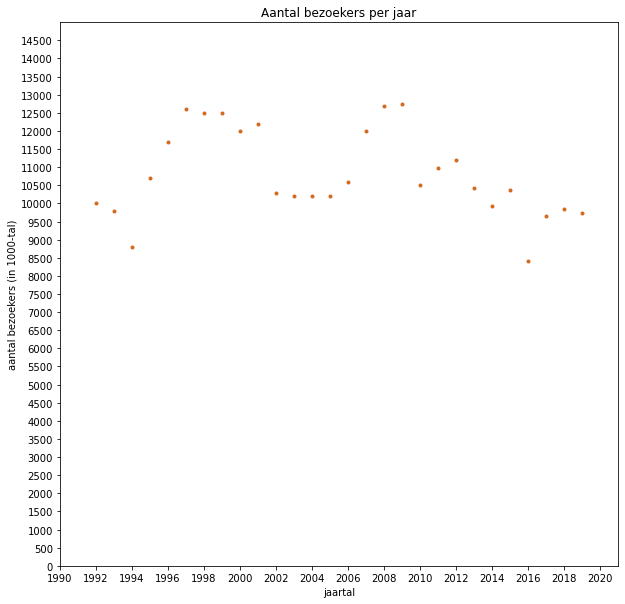

In [31]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=1990, xmax=2021, ymin=0, ymax=15000)        # vensterinstellingen  
plt.xticks(np.arange(1990, 2022, step=2))
plt.yticks(np.arange(0, 15000, step=500))
plt.title("Aantal bezoekers per jaar")
plt.xlabel("jaartal")
plt.ylabel("aantal bezoekers (in 1000-tal)")
plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

Je kan de correlatiecoëfficiënt bepalen met de functie `corrcoef()` uit de module NumPy. Deze functie geeft eigenlijk een tabel terug met 2 rijen en 2 kolommen, waarvan de correlatiecoëfficiënt te vinden is op de eerste rij in de tweede kolom.  

In [10]:
#voorbeeldscript
print("Correlatiecoëfficiënt R =", np.corrcoef(x, y)[0,1])      

Correlatiecoëfficiënt R = -0.2682568161384184


Dit wijst op een *negatieve zeer sterke lineaire samenhang* voor de brieven en een *positieve sterke lineaire samenhang* voor de pakjes. 

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [49]:
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en 'onthouden'
def linreg(rechte, x, y):
    """Rechte best passend bij datapunten x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit kijkt in def rechte hoe functievoorschrift eruit ziet
    # curve_fit geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return a, b                          # geeft coëfficiënten in vergelijking van regressielijn

In [50]:
# regressielijn zoeken voor de brieven
a, b = linreg(rechte, x, y)                # y_regressielijn verwijst naar f(x) van regressielijn f

y =  -39.42255062954087 x + 89876.06814470634


In [51]:
y_regressielijn = rechte(x, a, b)

<div>
    <font color=#690027 markdown="1">  
        <h2>4. Grafiek</h2> 
    </font>
</div>

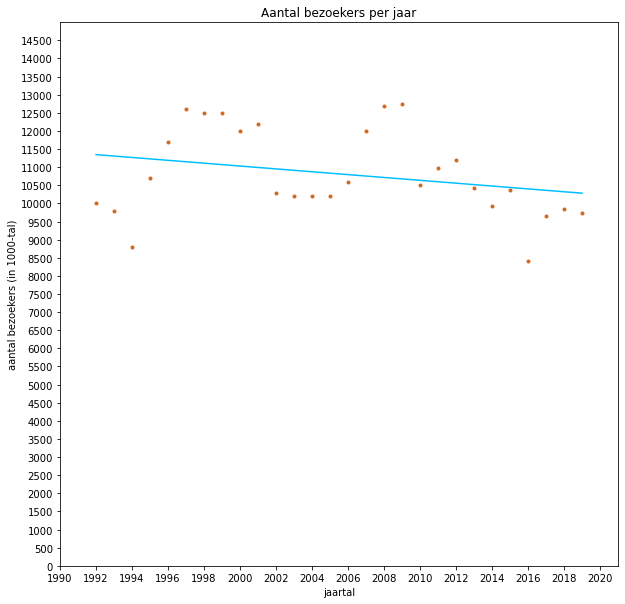

In [52]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=1990, xmax=2021, ymin=0, ymax=15000)        # vensterinstellingen  
plt.xticks(np.arange(1990, 2022, step=2))
plt.yticks(np.arange(0, 15000, step=500))
plt.title("Aantal bezoekers per jaar")
plt.xlabel("jaartal")
plt.ylabel("aantal bezoekers (in 1000-tal)")
plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk

plt.plot(x, y_regressielijn, color="deepskyblue")   # plot regressielijn


plt.show()                                          # toon grafiek

In [53]:
a * 2020 + b

10242.515873033772

Antwoord: meer dan 5 keer zoveel te verwachten

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Grommen, S. (20 augustus 2018). Waatom Bpost de postbedeling wil omgooien: de tanende brievenpost in cijfers. <br> &nbsp; &nbsp; &nbsp; &nbsp;https://en.wikipedia.org/wiki/Disneyland_Paris

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels, B. Van de Velde & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 